In [9]:
import numpy as np
import matplotlib.pyplot as plt 

In [10]:
lr_test = np.load('/PBL/PBL6/Data_train_np/lr_test_images.npy')
hr_test = np.load('/PBL//PBL6/Data_train_np/hr_test_images.npy')

In [11]:
g_loss_list = [] # average per epoch list 

for i in range(10):
  # if loss_file.startswith("g_loss"): 
    g_losses = np.load('/PBL/PBL6/save_loss/g_loss_' + str(i+1)+"npy.npy")
    g_loss = np.sum(g_losses) /len(g_losses)
    g_loss_list.append(g_loss)

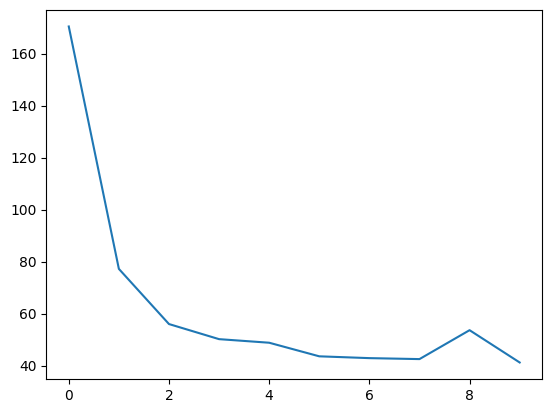

In [12]:
plt.plot(g_loss_list)

In [13]:
d_loss_list = [] # average per epoch list 

for i in range(10):
  # if loss_file.startswith("g_loss"): 
    d_losses = np.load('/PBL/PBL6/save_loss/d_loss_' + str(i+1)+"npy.npy")
    d_loss = np.sum(d_losses) /len(d_losses)
    d_loss_list.append(d_loss)

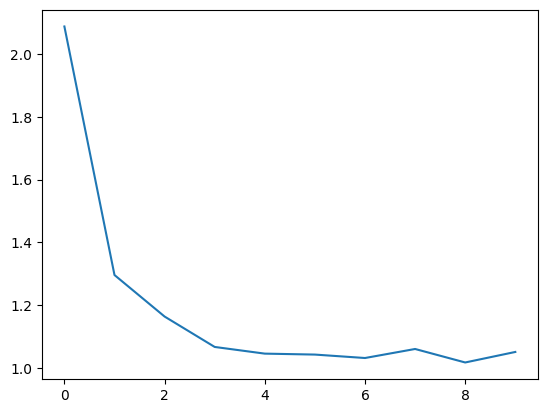

In [14]:
plt.plot(d_loss_list)

In [15]:
from keras.models import load_model
from numpy.random import randint
generator = load_model('/PBL/PBL6/save_model/gen_e_8.h5', compile=False)

550
[509]
1/1 [==============================] - 1s 510ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 128, 128, 3) (1, 32, 32, 3)


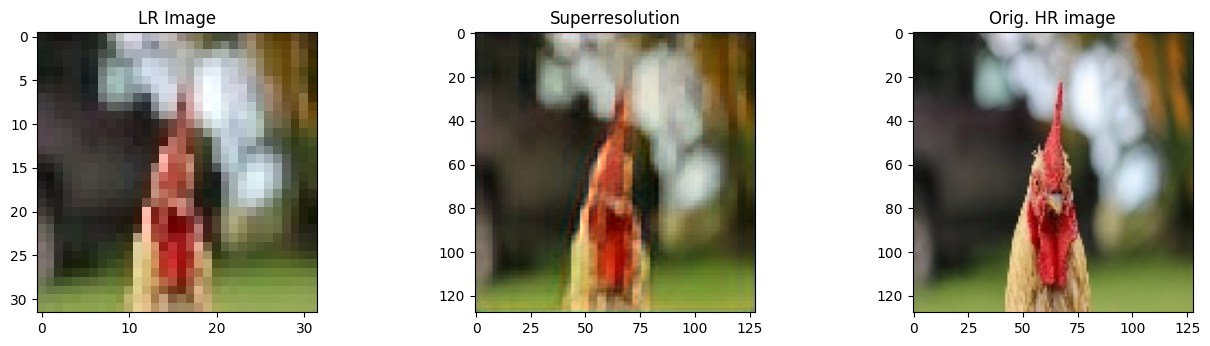

In [16]:
# plot all three images
[X1, X2] = [lr_test, hr_test]

# select random example 
ix = randint(0, len(X1),1)
print(len(X1))
# src_image, tar_image = X1[[91]], X2[[91]]
# ix=[476]
src_image, tar_image = X1[ix], X2[ix]
print(ix)

# generate image from source 
gen_image = generator.predict(src_image)
print(gen_image.shape,src_image.shape)
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('LR Image')
plt.imshow(src_image[0,:,:,:])
plt.subplot(232)
plt.title('Superresolution')
plt.imshow(gen_image[0,:,:,:])
plt.subplot(233)
plt.title('Orig. HR image')
plt.imshow(tar_image[0,:,:,:])

plt.show()